In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
### convert to standard units 
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)
def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

#  Distance

In [3]:
cells = Table.read_table('Breast_cancer_data.csv')
cells.show(5)

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
17.99,10.38,122.8,1001,0.1184,0
20.57,17.77,132.9,1326,0.08474,0
19.69,21.25,130,1203,0.1096,0
11.42,20.38,77.58,386.1,0.1425,0
20.29,14.34,135.1,1297,0.1003,0


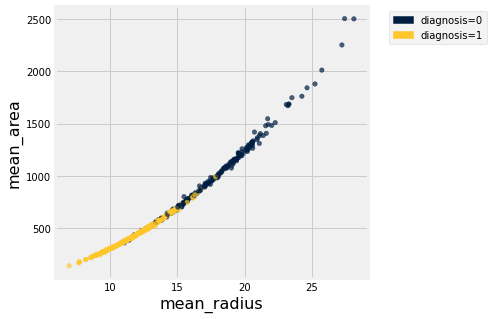

In [4]:
cells.scatter('mean_radius', 'mean_area', colors = 'diagnosis')

In [5]:
def distance(data1, data2):  ## square root of the sum of the differences squared
    '''returns the distance between two points'''
    return (sum((data1 - data2)**2)) ** 0.5

In [6]:
def row_distance(row1, row2):
    '''return the distance between two rows of a table'''
    return distance(np.array(row1), np.array(row2))

In [7]:
attributes_only = cells.drop('diagnosis')
attributes_only.show(5)

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
17.99,10.38,122.8,1001,0.1184
20.57,17.77,132.9,1326,0.08474
19.69,21.25,130,1203,0.1096
11.42,20.38,77.58,386.1,0.1425
20.29,14.34,135.1,1297,0.1003


In [8]:
row_distance(attributes_only.row(0), attributes_only.row(1))

325.2511024316376

In [9]:
row_distance(attributes_only.row(0), attributes_only.row(2))

202.42748572622247

In [10]:
row_distance(attributes_only.row(0), attributes_only.row(3))

616.6765958594585

In [11]:
su = standardize(cells.drop('diagnosis')).with_column('diagnosis', cells.column('diagnosis'))
su

mean_radius (su),mean_texture (su),mean_perimeter (su),mean_area (su),mean_smoothness (su),diagnosis
1.09706,-2.07334,1.26993,0.984375,1.56847,0
1.82982,-0.353632,1.68595,1.90871,-0.826962,0
1.57989,0.456187,1.5665,1.55888,0.94221,0
-0.768909,0.253732,-0.592687,-0.764464,3.28355,0
1.7503,-1.15182,1.77657,1.82623,0.280372,0
-0.476375,-0.835335,-0.387148,-0.50565,2.23742,0
1.17091,0.160649,1.13813,1.09529,-0.123136,0
-0.118517,0.35845,-0.0728668,-0.218965,1.60405,0
-0.320167,0.58883,-0.18408,-0.384207,2.20184,0
-0.473535,1.10544,-0.329482,-0.509063,1.5827,0


In [12]:
su_attributes = su.drop('diagnosis')

In [13]:
row_distance(su_attributes.row(0), su_attributes.row(1))

3.2031006823086536

In [14]:
row_distance(su_attributes.row(0), su_attributes.row(2))

2.727968231789022

In [15]:
row_distance(su_attributes.row(0), su_attributes.row(3))

4.285605537564085

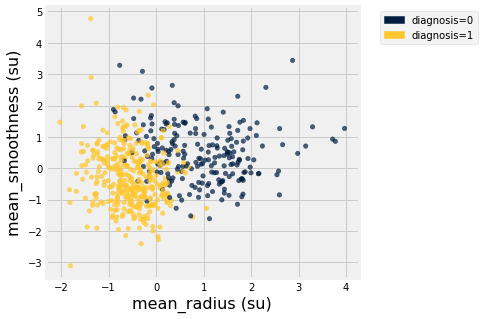

In [16]:
su.scatter('mean_radius (su)', 'mean_smoothness (su)', colors = 'diagnosis')

# Classifier

In [17]:
def distances(training, example):
    ''' compute a table with the training set and distances to the unknown example from each row in the training data set'''
    dists = []
    att = training.drop('diagnosis')
    for row in att.rows:
        distance = row_distance(row, example)
        dists.append(distance)
    return training.with_column('Distance', dists)

In [18]:
def closest(training, example, k):
    '''return a table of k closest neighbor to unknown sample'''
    dist_tbl = distances(training, example)
    sorted_dists = dist_tbl.sort('Distance')
    ktbl = sorted_dists.take(np.arange(k))
    return ktbl

In [19]:
cells.take(498)

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
18.49,17.52,121.3,1068,0.1012,0


In [20]:
example = cells.drop('diagnosis').row(498)

In [21]:
cells.exclude(498).drop('diangosis')

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
17.99,10.38,122.8,1001,0.1184,0
20.57,17.77,132.9,1326,0.08474,0
19.69,21.25,130,1203,0.1096,0
11.42,20.38,77.58,386.1,0.1425,0
20.29,14.34,135.1,1297,0.1003,0
12.45,15.7,82.57,477.1,0.1278,0
18.25,19.98,119.6,1040,0.09463,0
13.71,20.83,90.2,577.9,0.1189,0
13,21.82,87.5,519.8,0.1273,0
12.46,24.04,83.97,475.9,0.1186,0


In [22]:
closest(cells.exclude(498), example, 6)

mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,Distance
18.46,18.52,121.1,1075,0.09874,0,7.07396
18.45,21.91,120.2,1075,0.0943,0,8.33569
18.65,17.6,123.7,1076,0.1099,0,8.35417
18.66,17.12,121.4,1077,0.1054,0,9.01104
19.02,24.59,122,1076,0.09029,0,10.7124
18.31,20.58,120.8,1052,0.1068,0,16.2987


In [23]:
def majority_class(k_nn_tbl):
    '''return most common class'''
    return k_nn_tbl.group('diagnosis').sort('count', descending = True).column('diagnosis').item(0)

In [24]:
def classifier(training, example, k):
    '''return majority class for k nearest neighbors'''
    nearest = closest(training, example, k)   ## get the table of nearest neighbors
    return majority_class(nearest)  ## get the majority class of the those neighbors

In [25]:
classifier(cells.exclude(498), example, 19)

0

# Evaluation

In [26]:
cells.num_rows

569

In [27]:
shuffled = cells.sample(with_replacement= False)
training = shuffled.take(np.arange(400))
testing = shuffled.take(np.arange(400, 569))

In [29]:
def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('diagnosis')
    num_correct = 0
    for i in np.arange(test.num_rows):
        # Run the classifier on the ith patient in the test set
        test_patient = test_attributes.row(i)
        c = classifier(training, test_patient, k)
        # Was the classifier's prediction correct?
        if c == test.column('diagnosis').item(i):
            num_correct = num_correct + 1
    return num_correct / test.num_rows

In [30]:
evaluate_accuracy(training, testing, 5)

0.8165680473372781

In [31]:
evaluate_accuracy(training, testing, 1)

0.8165680473372781

In [32]:
evaluate_accuracy(training, testing, 34)

0.8698224852071006

# Decision Boundaries

In [33]:
rad_smooth = cells.select('mean_radius', 'mean_smoothness', 'diagnosis')

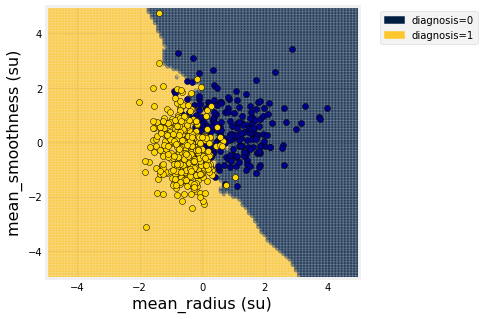

In [34]:
def decision_boundary(t, k):
    """Decision boundary of a two-column + Class table."""
    t_su = standardize(t.drop('diagnosis')).with_column('diagnosis', t.column('diagnosis'))
    decisions = Table(t_su.labels)
    for x in np.arange(-5, 5.1, 0.1):
        for y in np.arange(-5, 5.1, 0.1):
            predicted = classifier(t_su, make_array(x, y), k)
            decisions.append([x, y, predicted])
    decisions.scatter(0, 1, colors='diagnosis', alpha=0.4)
    plots.xlim(-5, 5)
    plots.ylim(-5, 5)
    t_su_0 = t_su.where('diagnosis', 0)
    t_su_1 = t_su.where('diagnosis', 1)
    plots.scatter(t_su_0.column(0), t_su_0.column(1), c='darkblue', edgecolor='k')
    plots.scatter(t_su_1.column(0), t_su_1.column(1), c='gold', edgecolor='k')
    
decision_boundary(rad_smooth, 5)